In [425]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import nbformat
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [426]:
# reading the .csv file
df = pd.read_csv('/home/nicholas/repos/ifood_da_challenge/ml_project1_data.csv')

# checking for data types
print(df.dtypes, "\n")

# cheking number o rows and columns
print(df.shape, "(rows, columns)\n")

# cheking the percentege of null values
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object 

(2240, 29) (rows, columns)

ID: 0.0%
Year_Birth: 0.0%
Education: 0.0%
Marital_Status:

In [427]:
# replacing missing values by the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [428]:
# Looking for outliers

#warnings.filterwarnings('ignore')
#print('Income')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['Income'])
#plt.show()

print("Upper fence value for income:", int(df['Income'].mean() + 3*df['Income'].std()))

#print('MntWines')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['MntWines'])
#plt.show()

print("Upper fence value for MntWines:", int(df['MntWines'].mean() + 3*df['MntWines'].std()))

#print('MntFruits')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['MntFruits'])
#plt.show()

print("Upper fence value for MntFruits:", int(df['MntFruits'].mean() + 3*df['MntFruits'].std()))

#print('MntMeatProducts')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['MntMeatProducts'])
#plt.show()

print("Upper fence value for MntMeatProducts:", int(df['MntMeatProducts'].mean() + 3*df['MntMeatProducts'].std()))

#print('MntFishProducts')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['MntFishProducts'])
#plt.show()

print("Upper fence value for MntFishProducts:", int(df['MntFishProducts'].mean() + 3*df['MntFishProducts'].std()))

#print('MntSweetProducts')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['MntSweetProducts'])
#plt.show()

print("Upper fence value for MntSweetProducts:", int(df['MntSweetProducts'].mean() + 3*df['MntSweetProducts'].std()))

#print('MntGoldProds')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['MntGoldProds'])
#plt.show()

print("Upper fence value for MntGoldProds:", int(df['MntGoldProds'].mean() + 3*df['MntGoldProds'].std()))

#print('NumDealsPurchases')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['NumDealsPurchases'])
#plt.show()

print("Upper fence value for NumDealsPurchases:", int(df['NumDealsPurchases'].mean() + 3*df['NumDealsPurchases'].std()))

#print('NumWebPurchases')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['NumWebPurchases'])
#plt.show()

print("Upper fence value for NumWebPurchases:", int(df['NumWebPurchases'].mean() + 3*df['NumWebPurchases'].std()))

#print('NumCatalogPurchases')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['NumCatalogPurchases'])
#plt.show()

print("Upper fence value for NumCatalogPurchases:", int(df['NumCatalogPurchases'].mean() + 3*df['NumCatalogPurchases'].std()))

#print('NumStorePurchases')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['NumStorePurchases'])
#plt.show()

print("Upper fence value for NumStorePurchases:", int(df['NumStorePurchases'].mean() + 3*df['NumStorePurchases'].std()))

#print('NumWebVisitsMonth')
#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
#sns.distplot(df['NumWebVisitsMonth'])
#plt.show()

print("Upper fence value for NumWebVisitsMonth:", int(df['NumWebVisitsMonth'].mean() + 3*df['NumWebVisitsMonth'].std()))

Upper fence value for income: 127360
Upper fence value for MntWines: 1313
Upper fence value for MntFruits: 145
Upper fence value for MntMeatProducts: 844
Upper fence value for MntFishProducts: 201
Upper fence value for MntSweetProducts: 150
Upper fence value for MntGoldProds: 200
Upper fence value for NumDealsPurchases: 8
Upper fence value for NumWebPurchases: 12
Upper fence value for NumCatalogPurchases: 11
Upper fence value for NumStorePurchases: 15
Upper fence value for NumWebVisitsMonth: 12


In [429]:
# removing outliers

df.drop(df[df.Income>127360].index, inplace=True)

df.drop(df[df.MntWines>1313].index, inplace=True)

df.drop(df[df.MntFruits>145].index, inplace=True)

df.drop(df[df.MntMeatProducts>844].index, inplace=True)

df.drop(df[df.MntFishProducts>201].index, inplace=True)

df.drop(df[df.MntSweetProducts>150].index, inplace=True)

df.drop(df[df.MntGoldProds>200].index, inplace=True)

df.drop(df[df.NumDealsPurchases>8].index, inplace=True)

df.drop(df[df.NumWebPurchases>12].index, inplace=True)

df.drop(df[df.NumCatalogPurchases>11].index, inplace=True)

df.drop(df[df.NumStorePurchases>15].index, inplace=True)

df.drop(df[df.NumWebVisitsMonth>12].index, inplace=True)

In [430]:
# Text Normalization

df_str = list(df.select_dtypes(include = 'object').columns.values)
df_numeric = list(df.select_dtypes(include = ['int64', 'float64']).columns.values)
df_columns = list(df.columns.values)

for i in df_str:
    df[i].str.lower()
    df[i].str.strip()
    df[i].replace('[^\w\s]', '', regex=True, inplace=True)

In [431]:
print(df['Marital_Status'].unique()) # looking for weird values

df.drop(df[df.Marital_Status == 'YOLO'].index, inplace=True)
df.drop(df[df.Marital_Status == 'Alone'].index, inplace=True)
df.drop(df[df.Marital_Status == 'Absurd'].index, inplace=True)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [432]:
# Verifing if the data is inbalanced

# class count
class_count_0, class_count_1 = df['Response'].value_counts()

# Separate class
class_0 = df[df['Response'] == 0]
class_1 = df[df['Response'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1713, 29)
class 1: (261, 29)


In [433]:
#class_1_over = class_1.sample(class_count_0, replace=True)

#test_over = pd.concat([class_1_over, class_0], axis=0)

#print("total class of 1 and 0:\n",test_over['Response'].value_counts()) # plot the count after under-sampeling
#test_over['Response'].value_counts().plot(kind='bar', title='count (target)')



ros = RandomOverSampler(random_state=42)

y_ros = ros.fit_resample(x, y)

print('Original dataset shape Counter'(y))
print('Resample dataset shape Counter'(y_ros))

<>:14: SyntaxWarning:

'str' object is not callable; perhaps you missed a comma?

<>:15: SyntaxWarning:

'str' object is not callable; perhaps you missed a comma?

<>:14: SyntaxWarning:

'str' object is not callable; perhaps you missed a comma?

<>:15: SyntaxWarning:

'str' object is not callable; perhaps you missed a comma?



NameError: name 'x' is not defined

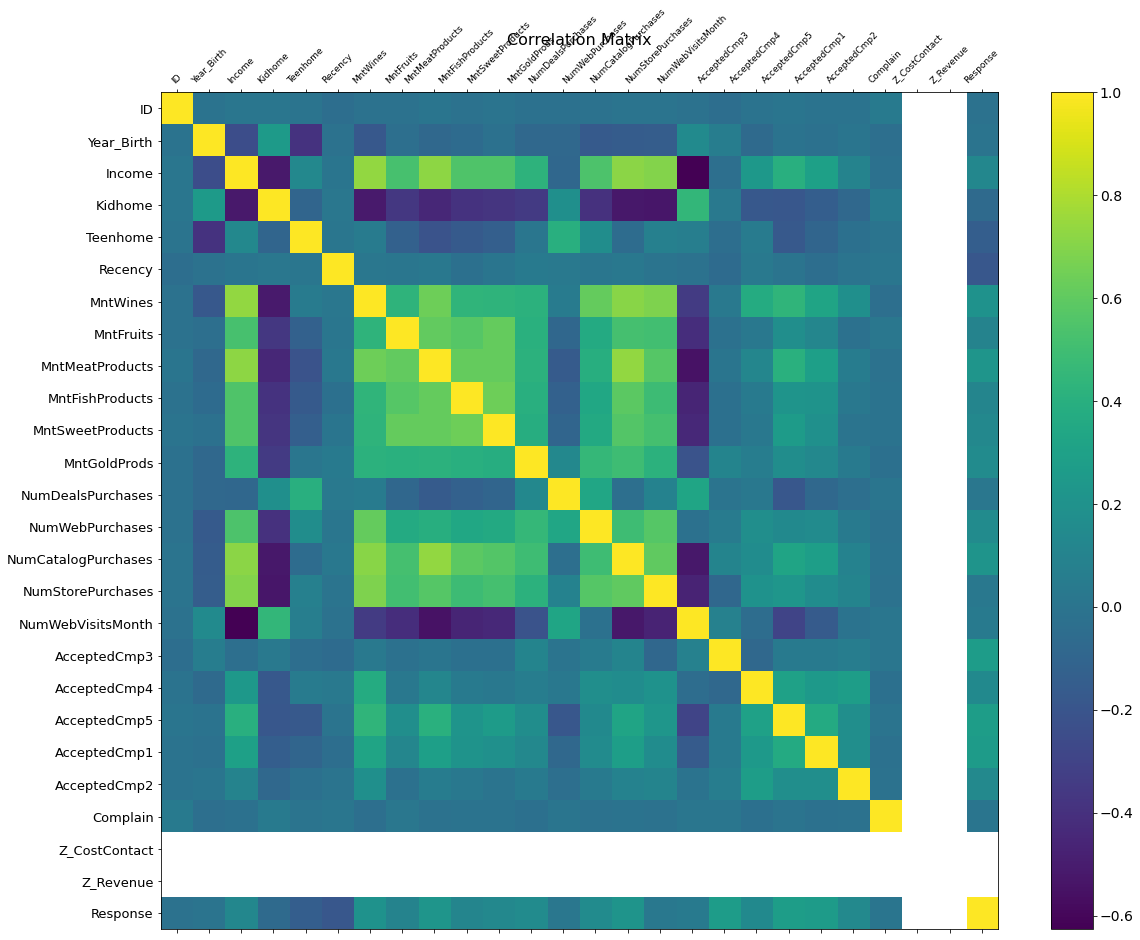

In [ ]:
#correlation graph

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# removing Z columns

df.drop('Z_CostContact', axis = 1, inplace=True)
df.drop('Z_Revenue', axis = 1, inplace=True)

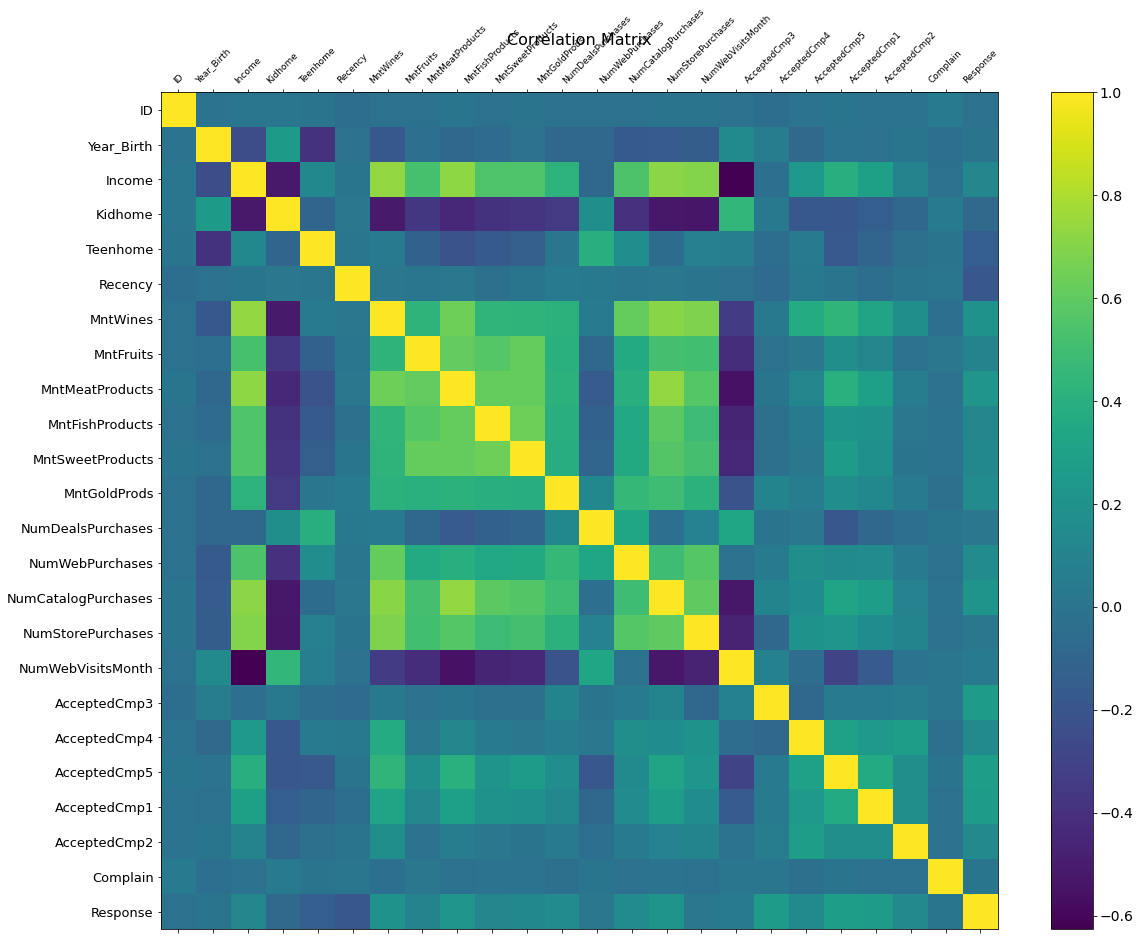

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# spliting data

Y = test_over['Response'].values

features = ['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

test_over = pd.get_dummies(test_over[features])

X_train, X_test, Y_train, Y_test = train_test_split(test_over, Y, test_size=0.25, shuffle=True)

In [ ]:
# using SVC model

clf = svm.SVC(gamma=0.001)

clf.fit(X_train, Y_train) #Testing SVC model
predict = clf.predict(X_test)

print("SVC accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, predict)))

SVC accuracy: 0.9965
